<a href="https://colab.research.google.com/github/safaa12/zen-city/blob/main/zen_city.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [3]:
from google.colab import drive
drive.mount('/content/drive')
rentals = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/zen_city_project/rentals.csv')
station_id = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/zen_city_project/station_info.csv')

Mounted at /content/drive


In [4]:
station_id.head(5)

,station_id,name,status,location,address,alternate_name,city_asset_number,property_type,number_of_docks,power_type,footprint_length,footprint_width,notes,council_district,image,modified_date
0,1004,Red River & LBJ Library,closed,"(30.2848, -97.72756)",2322 Red River Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2021-01-04 00:00:00.000000 UTC
1,1005,State Parking Garage @ Brazos & 18th,closed,"(30.27907, -97.73715)",1789 Brazos St.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2021-01-04 00:00:00.000000 UTC
2,2541,State Capitol @ 14th & Colorado,closed,"(30.27654, -97.74155)",206 W. 14th St.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,2021-01-04 00:00:00.000000 UTC
3,1007,Lavaca & 6th,closed,"(30.26889, -97.74525)",601 Lavaca St.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,2021-01-04 00:00:00.000000 UTC
4,1002,6th & Navasota St.,closed,"(30.26383, -97.72864)",1308 W. 6th St.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,2021-01-04 00:00:00.000000 UTC


In [5]:
rentals.head(5)


,trip_id,subscriber_type,bike_id,bike_type,start_time,start_station_id,start_station_name,end_station_id,end_station_name,duration_minutes
0,26166205,Local365,19608,electric,2022-03-15 13:13:59.000000 UTC,2547,21st/Guadalupe,2552.0,3rd/West,9
1,26017060,Pay-as-you-ride,2197,classic,2022-02-13 11:23:29.000000 UTC,2547,21st/Guadalupe,2552.0,3rd/West,25
2,26029611,Local31,23251,electric,2022-02-15 17:49:15.000000 UTC,2547,21st/Guadalupe,2552.0,3rd/West,42
3,25896788,Student Membership,19706,electric,2022-01-10 13:32:37.000000 UTC,2547,21st/Guadalupe,2552.0,3rd/West,10
4,26003292,Pay-as-you-ride,451,classic,2022-02-10 10:03:05.000000 UTC,2547,21st/Guadalupe,2552.0,3rd/West,49


##Facing a Business Topic:
The Business topics that we might be interesting in are:
1. how is the number of rides affected by seasonality?
2. how is the number of rides affected by Time of Day/Week?
3. how is the number of rides affected by user type?
4. how is the number of rides affected by maintainabilty of the stations network?
5. popularity by bike type (classic vs. electric)
6. how does the weather affect the number of rides?
7. Outlieres

In [6]:
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10780 entries, 0 to 10779
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   trip_id             10780 non-null  int64  
 1   subscriber_type     10780 non-null  object 
 2   bike_id             10780 non-null  object 
 3   bike_type           10780 non-null  object 
 4   start_time          10780 non-null  object 
 5   start_station_id    10780 non-null  int64  
 6   start_station_name  10780 non-null  object 
 7   end_station_id      10779 non-null  float64
 8   end_station_name    10780 non-null  object 
 9   duration_minutes    10780 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 842.3+ KB


In [7]:
rentals.isna().sum()

,0
trip_id,0
subscriber_type,0
bike_id,0
bike_type,0
start_time,0
start_station_id,0
start_station_name,0
end_station_id,1
end_station_name,0
duration_minutes,0


One Null end_station_id

In [8]:
rentals.nunique() #cardinality of the whole table.


,0
trip_id,10780
subscriber_type,11
bike_id,570
bike_type,2
start_time,10756
start_station_id,7
start_station_name,7
end_station_id,80
end_station_name,82
duration_minutes,263


In [9]:
missing_rentals_mask = rentals.isna().sum()
missing_rentals_mask

,0
trip_id,0
subscriber_type,0
bike_id,0
bike_type,0
start_time,0
start_station_id,0
start_station_name,0
end_station_id,1
end_station_name,0
duration_minutes,0


1.   start_station_id	= 7 we can understand: there are only 7 stations that departs all the rides (out of 101 listed station).
2.  There is 80 end_station_ids and 82 end_station_names (Inconsistancy)
3.  One null end_station_id


In [10]:

# ניקוי ערכים חסרים והמרת סוג נתונים
rentals['end_station_id'] = pd.to_numeric(rentals['end_station_id'])

# 1. שליפת מזהי התחנות הייחודיים מהנסיעות
unique_starts = rentals['start_station_id'].unique()
unique_ends = rentals['end_station_id'].dropna().unique().astype(int)

# 2. בדיקה: האם התחנות קיימות בטבלת station_info?
missing_starts = [s for s in unique_starts if s not in station_id['station_id'].values]
missing_ends = [e for e in unique_ends if e not in station_id['station_id'].values]

# 3. בדיקה: האם הסטטוס של התחנות הללו הוא 'active'?
active_stations = station_id[station_id['status'] == 'active']['station_id'].values
not_active_starts = [s for s in unique_starts if s not in active_stations and s not in missing_starts]
not_active_ends = [e for e in unique_ends if e not in active_stations and e not in missing_ends]

# הדפסת התוצאות
print(f"נמצאו {len(unique_starts)} תחנות מוצא ייחודיות.")
print(f"נמצאו {len(unique_ends)} תחנות סיום ייחודיות.")

print(f"\nתחנות חסרות ב-station_id (מוצא): {missing_starts}")
print(f"תחנות חסרות ב-station_id (סיום): {missing_ends}")

print(f"\nתחנות קיימות אך לא פעילות (מוצא): {not_active_starts}")
print(f"תחנות קיימות אך לא פעילות (סיום): {not_active_ends}")

נמצאו 7 תחנות מוצא ייחודיות.
נמצאו 80 תחנות סיום ייחודיות.

תחנות חסרות ב-station_id (מוצא): [np.int64(4938)]
תחנות חסרות ב-station_id (סיום): [np.int64(7188), np.int64(7131), np.int64(4938), np.int64(7125), np.int64(7190), np.int64(7187)]

תחנות קיימות אך לא פעילות (מוצא): []
תחנות קיימות אך לא פעילות (סיום): [np.int64(3455)]


80 end_stations_id vs. 82 end_station_name
There was only 77 active stations in the stations table --> how come there's 80 end stations
The answer: graveyary stations = trips are ending in the following stations: station 3455 (listed as closed) + station 4938 (not registered)

In [11]:
# 1. ניקוי מזהי תחנות הקצה (הסרת ערכים ריקים והמרה למספר שלם)
unique_end_ids = rentals['end_station_id'].dropna().unique().astype(int)

# 2. סינון טבלת התחנות כך שתישארנה רק התחנות שמוגדרות כ-active
active_stations_list = station_id[station_id['status'] == 'active']['station_id'].tolist()

# 3. מציאת התחנות שהן גם פעילות וגם מופיעות כנקודת סיום (חיתוך בין הרשימות)
active_end_stations = [s_id for s_id in unique_end_ids if s_id in active_stations_list]

# הדפסת התוצאה
print(f"מספר התחנות הפעילות ששימשו כנקודת סיום: {len(active_end_stations)}")
print(f"רשימת ה-IDs של 73 התחנות: {active_end_stations}")

מספר התחנות הפעילות ששימשו כנקודת סיום: 73
רשימת ה-IDs של 73 התחנות: [np.int64(2552), np.int64(2537), np.int64(2501), np.int64(3792), np.int64(3621), np.int64(3794), np.int64(3390), np.int64(3294), np.int64(4047), np.int64(3838), np.int64(2565), np.int64(2574), np.int64(4055), np.int64(2494), np.int64(2495), np.int64(4050), np.int64(4057), np.int64(3619), np.int64(2496), np.int64(2571), np.int64(3685), np.int64(4051), np.int64(2547), np.int64(3687), np.int64(2542), np.int64(3797), np.int64(3793), np.int64(2562), np.int64(3292), np.int64(3660), np.int64(2707), np.int64(2563), np.int64(3291), np.int64(4879), np.int64(4052), np.int64(3795), np.int64(3798), np.int64(2572), np.int64(3791), np.int64(2498), np.int64(2569), np.int64(2503), np.int64(2711), np.int64(3684), np.int64(2499), np.int64(2570), np.int64(2568), np.int64(4061), np.int64(3686), np.int64(2504), np.int64(4058), np.int64(3790), np.int64(2822), np.int64(3799), np.int64(4048), np.int64(4059), np.int64(2497), np.int64(2549), np

Explaining The "Station Gap" :
We found a gap between the 77 active stations in the database and the 80 stations where trips actually ended. Here is the simple explanation:


Graveyard Stations: Users are returning bikes to stations that are officially "Closed" (like station 3455) .

Orphan Stations: There are several stations (like 7188, 7125, 7131) that are not in the database at all but still receive bikes .

Data Issues: Some stations have multiple names for the same ID, which is why we see 82 names but only 80 IDs .

End Station Breakdown (80 Unique IDs): The 80 unique station IDs identified as trip destinations in the rentals data are categorized as follows:


1.   73 Active Stations: These stations are correctly registered as 'active' in the station_id database and actively received bike arrivals
2.   Orphan Stations: These IDs (7188, 7131, 4938, 7125, 7190, 7187) are completely missing from the official asset database .
3.   Closed Station: Station 3455 is officially registered as 'closed' but continues to receive bike arrivals, acting as a "Graveyard Station" .

Total: 73 + 6 + 1 = 80 Unique End Stations.

In [12]:
#1. חילוץ latitude ו-longitude מעמודת location
def split_location(loc_str):
    try:
        clean_str = str(loc_str).replace('(', '').replace(')', '')
        lat, lon = clean_str.split(',')
        return float(lat), float(lon)
    except:
        return np.nan, np.nan

station_id[['latitude', 'longitude']] = station_id['location'].apply(
    lambda x: pd.Series(split_location(x))
)

#2. שליפת נתוני ה-Proxy מתחנה 3841
proxy_lat = station_id.loc[station_id['station_id'] == 3841, 'latitude'].values[0]
proxy_lon = station_id.loc[station_id['station_id'] == 3841, 'longitude'].values[0]


# 1. איחוד עבור תחנת ההתחלה (Start)
# אנחנו משנים את השמות בתוך ה-Select (הסוגריים המרובעים) כדי למנוע כפילויות
rentals = pd.merge(
    rentals,
    station_id[['station_id', 'latitude', 'longitude']].rename(columns={'latitude': 'start_lat', 'longitude': 'start_lon'}),
    left_on='start_station_id',
    right_on='station_id',
    how='left'
).drop(columns=['station_id'])

# 2. איחוד עבור תחנת הסיום (End)
rentals = pd.merge(
    rentals,
    station_id[['station_id', 'latitude', 'longitude']].rename(columns={'latitude': 'end_lat', 'longitude': 'end_lon'}),
    left_on='end_station_id',
    right_on='station_id',
    how='left'
).drop(columns=['station_id'])

#4. תיקון ידני לתחנה היתומה 4938 בתוך טבלת rentals
mask_4938 = rentals['start_station_id'] == 4938
rentals.loc[mask_4938, 'latitude'] = proxy_lat
rentals.loc[mask_4938, 'longitude'] = proxy_lon

# בדיקת הסטטוס של תחנה 3455 (תחנה בית קברות) בטבלה הממוזגת
station_3455_info = station_id[station_id['station_id'] == 3455]
print(f"Status of 3455: {station_3455_info['status'].values[0]}")

print("הנתונים מוכנים לניתוח.")

Status of 3455: closed
הנתונים מוכנים לניתוח.


In summary, we handled the suspicious data as follows:

1.   Fixed Station 4938: Since the popular station 4938 was missing from our list, we gave it the location of the nearest station .

2.   Flagged Station 3455: We marked station 3455 as a "Graveyard Station" because it is officially closed but still receives bikes .

3. Labeled Missing End Stations: We labeled several end stations (7188, 7131, 4938, 7125, 7190, 7187) as "Unregistered" because they are not in our database .


In [13]:
station_id.nunique()
#we can understand: there is one name missing
#                   there are 4 stations with missing address

#show the station id with the missing name
#shaow the stations with 'closed' status
#show the stations with the missing address ->calculate it from location value

,0
station_id,101
name,100
status,2
location,101
address,97
alternate_name,2
city_asset_number,75
property_type,5
number_of_docks,12
power_type,2


we notice: inconsistancy in data types (compared to BQ)
- start time is a string not timestamp (in BQ it is a timestamp).
- end_station_id is float --> need to convert to int64 (in BigQuery it's string not float)

**also for station_id!!!

In [14]:
missing_station_mask = station_id.isna().sum()
missing_station_mask

,0
station_id,0
name,0
status,0
location,0
address,1
alternate_name,99
city_asset_number,24
property_type,20
number_of_docks,20
power_type,20


In [15]:
station_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station_id         101 non-null    int64  
 1   name               101 non-null    object 
 2   status             101 non-null    object 
 3   location           101 non-null    object 
 4   address            100 non-null    object 
 5   alternate_name     2 non-null      object 
 6   city_asset_number  77 non-null     float64
 7   property_type      81 non-null     object 
 8   number_of_docks    81 non-null     float64
 9   power_type         81 non-null     object 
 10  footprint_length   79 non-null     float64
 11  footprint_width    79 non-null     float64
 12  notes              31 non-null     object 
 13  council_district   101 non-null    int64  
 14  image              0 non-null      float64
 15  modified_date      101 non-null    object 
 16  latitude           101 non

Here we can see an issue regarding the address of the stations:
earlier counted 97 addresess, now we can see only 1 null address, which means there are **duplicates** in addresess.

In [16]:
# זיהוי שורות שבהן הכתובת מופיעה יותר מפעם אחת
# keep=False מבטיח שנראה את כל המופעים של הכתובת הכפולה
duplicate_addresses = station_id[station_id.duplicated(subset=['address'], keep=False)]

# מיון לפי כתובת כדי לראות את הזוגות/קבוצות יחד
duplicate_addresses = duplicate_addresses.sort_values(by='address')

print(f"נמצאו {len(duplicate_addresses)} שורות עם כתובות כפולות.")
print(duplicate_addresses[['station_id', 'name', 'address', 'status']])

נמצאו 6 שורות עם כתובות כפולות.
    station_id                           name  \
3         1007                   Lavaca & 6th   
31        3294                   Lavaca & 6th   
15        1006               Zilker Park West   
25        2574                    Zilker Park   
23        2575           Riverside @ S. Lamar   
52        2566  Pfluger Bridge @ W 2nd Street   

                                 address  status  
3                         601 Lavaca St.  closed  
31                        601 Lavaca St.  active  
15                     Barton Springs Rd  closed  
25                     Barton Springs Rd  active  
23  Presented by Austin Parks Foundation  active  
52  Presented by Austin Parks Foundation  active  


In [17]:
station_id['number_of_docks'].describe()

,number_of_docks
count,81.000000
mean,13.580247
std,2.827827
min,9.000000
25%,12.000000
50%,13.000000
75%,15.000000
max,22.000000


In [18]:
station_id.shape

(101, 18)

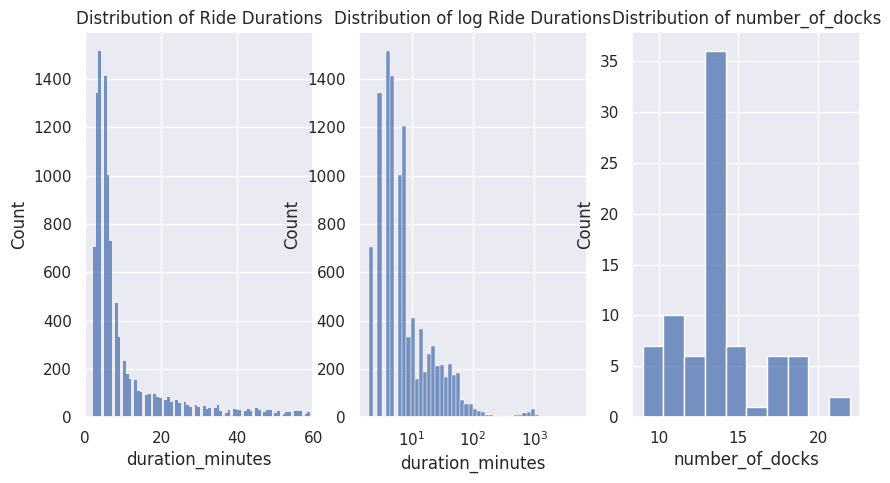

In [19]:
#distribution of numeric variables:
#distribution of ride_duration: overall, we can see short rides (less than 10 mins) are more frequent. (ignoring the outliers)
plt.figure(figsize=(10,5))
ax = plt.subplot(1,3,1)

sns.histplot(rentals['duration_minutes'])
#plt.xlim(60) #result:axis x was opposit (it started from 60 and down)
ax.set_xlim(0,60)
plt.title('Distribution of Ride Durations')
#we can see the data distribution is skewd right

# - we can also use log(rentals['duration_minutes']) without ignoring the outliers.
plt.subplot(1,3,2)
sns.histplot(
    data=rentals,
    x='duration_minutes',
    log_scale=True,
    bins=50
)
plt.title('Distribution of log Ride Durations')# to see the whole picture without getting rid of the outliers
plt.subplot(1,3,3)
#distribution of number of docks: most stations have 12.5-15 docks
sns.histplot(station_id['number_of_docks'])
plt.title('Distribution of number_of_docks')
plt.show()

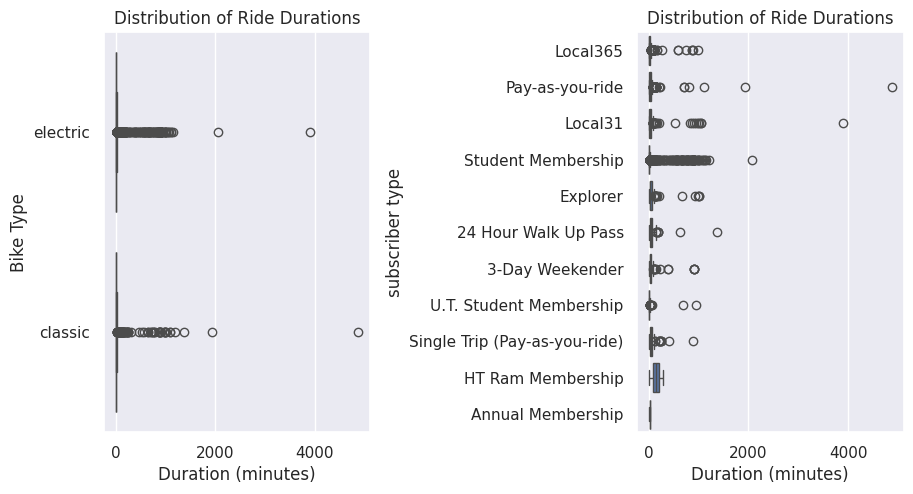

In [20]:
plt.figure(figsize=(10,5))
duration_bikeType = plt.subplot(1,2,1)
sns.boxplot(x=rentals['duration_minutes'], y=rentals['bike_type']) # Use 'y' for vertical, 'x' for horizontal
plt.title('Distribution of Ride Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Bike Type')

duration_bikerType = plt.subplot(1,2,2)
sns.boxplot(x=rentals['duration_minutes'], y=rentals['subscriber_type']) # Use 'y' for vertical, 'x' for horizontal
plt.title('Distribution of Ride Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('subscriber type')

plt.subplots_adjust(
    wspace=1,  # רווח אופקי בין הגרפים (Width space)
    hspace=0.5,  # רווח אנכי בין הגרפים (Height space - לא רלוונטי בדוגמה 1x2)
    left=0.1,    # רווח משמאל
    right=0.9,   # רווח מימין
    top=0.9,     # רווח מלמעלה
    bottom=0.1   # רווח מלמטה
)
plt.show()

Insights:

1.   Most Popular Bikes: Electric bikes are the top choice for students.
2.   User Comparison: We can filter the data to see the clear differences between subscriber types.
3.   Short Trips: The small size of the boxes (in the box plot) shows that most trips are very short.
4.   Bike Type & Duration: Classic bikes are used for longer trips compared to electric bikes, likely due to battery limits .


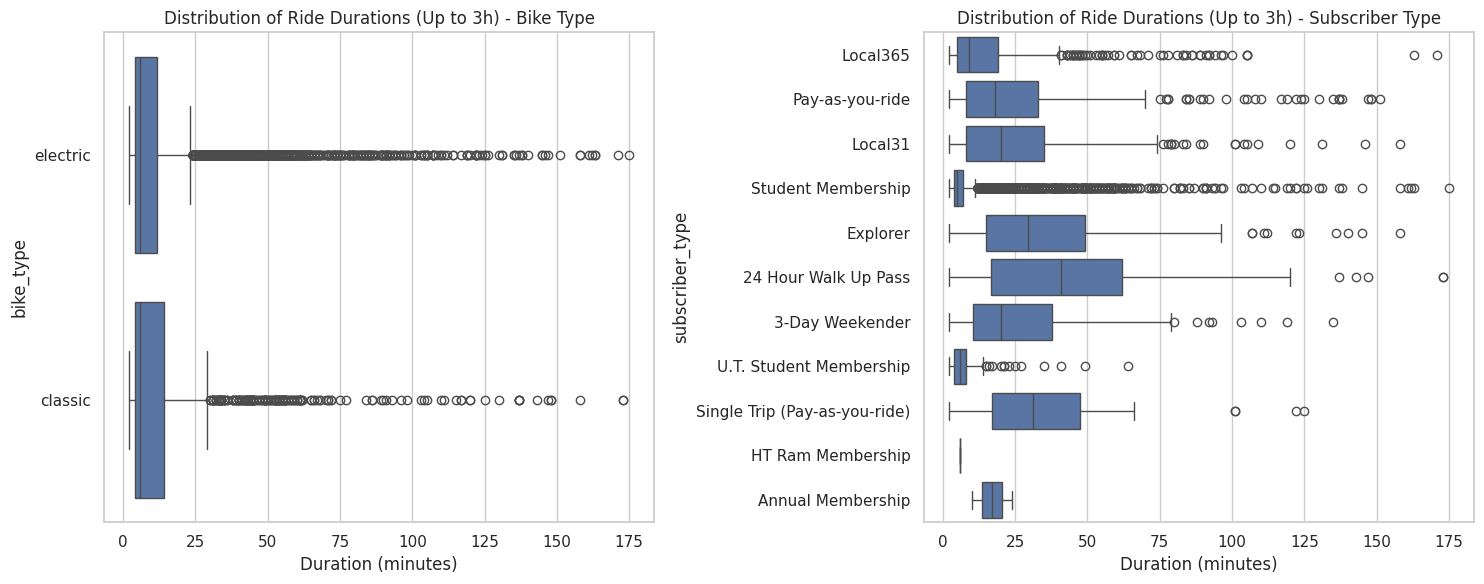

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. סינון הנתונים - נשמור רק נסיעות קצרות מ-180 דקות
rentals_filtered = rentals[rentals['duration_minutes'] <= 180]

# הגדרת סגנון ויזואלי
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# גרף 1: התפלגות לפי סוג אופניים (ללא חריגים קיצוניים)
sns.boxplot(data=rentals_filtered, x='duration_minutes', y='bike_type', ax=axes[0])
axes[0].set_title('Distribution of Ride Durations (Up to 3h) - Bike Type')
axes[0].set_xlabel('Duration (minutes)')

# גרף 2: התפלגות לפי סוג מנוי (ללא חריגים קיצוניים)
sns.boxplot(data=rentals_filtered, x='duration_minutes', y='subscriber_type', ax=axes[1])
axes[1].set_title('Distribution of Ride Durations (Up to 3h) - Subscriber Type')
axes[1].set_xlabel('Duration (minutes)')

plt.tight_layout()
plt.show()

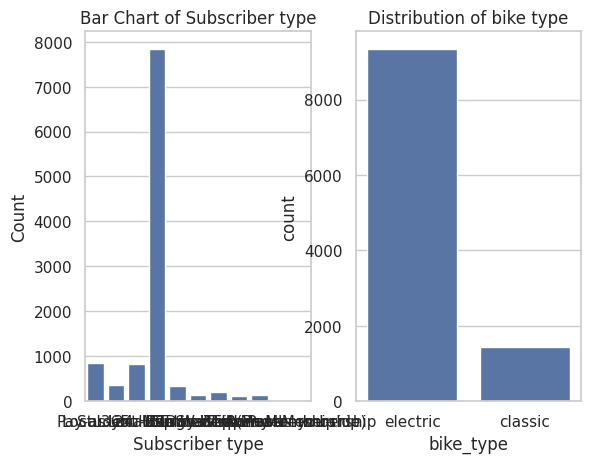

In [22]:
#distribution of catagorical variables:
#distribution of subscriber_type:
plt.subplot(1,2,1)
sns.countplot(x='subscriber_type', data=rentals)
plt.title('Bar Chart of Subscriber type')
plt.xlabel('Subscriber type')
plt.ylabel('Count')
plt.subplot(1,2,2)
#distribution of bike type: preference of riders
sns.countplot(x='bike_type', data=rentals)
plt.title('Distribution of bike type')
plt.show()

Addressing the Business topics:
*   calculate seasonality
*   calculate Time of Day/Week
*   number of rides by user type
*   maintainabilty of the stations network
*   popularity by bike type (classic vs. electric)
*   how does the weather affect the number of rides - NOT ENOUGH DATA
*   Outlieres
*   MODE










Data cleaning and Wrangling

In [23]:

#rentals records: there is one missing end station id for the name = 'Springfest 2022'
mask_missing_id = rentals[rentals['end_station_id'].isna() == True]
mask_missing_id #showing the station with the missing id
#what's the second missing end_station_id --> doing merge maybe?????

,trip_id,subscriber_type,bike_id,bike_type,start_time,start_station_id,start_station_name,end_station_id,end_station_name,duration_minutes,start_lat,start_lon,end_lat,end_lon,latitude,longitude
3112,26160487,Pay-as-you-ride,1834,classic,2022-03-14 15:39:24.000000 UTC,3797,21st/University,NaN,Springfest 2022,12,30.28354,-97.73953,NaN,NaN,NaN,NaN


In [24]:
# 4 station addresses missing - address.nunique = 97 out of 101

mask_missing_address = station_id[station_id['address'].isna() == True]
mask_missing_address
#station_id records: there is one station WITH missing address in station_id table
address_dups = station_id.groupby('address')['station_id'].count()
address_dups
address_dups.sort_values(ascending=False)
# Barton Springs Rd	--> 2
# Presented by Austin Parks Foundation	--> 2
# 601 Lavaca St.	--> 2
#--> which means 3 more missing address (3 different addresses duplicated) + the null address ==> 101 stations

#There is one station name missing from station_id table --> not null so it must've been duplicate
mask_missing_name = station_id[station_id['name'].isna() == True]
mask_missing_name
name_dups = station_id.groupby('name')['station_id'].count()
name_dups.idxmax()
# name_dups_sorted = name_dups.sort_values(ascending=False)
# name_dups_sorted.idxmax()

'Lavaca & 6th'

In [25]:
#show the stations with the missing address ->calculate it from location value
#Reverse Geocoding (Coordinates to Address)

In [26]:
import pandas as pd

# 1. המרה של העמודה לפורמט תאריך (חובה לעשות השמה מחדש לעמודה)
rentals['start_time'] = pd.to_datetime(rentals['start_time'])

# 2. חילוץ שם היום לעמודה חדשה
rentals['day_of_week'] = rentals['start_time'].dt.day_name()

# הצגת התוצאה
print(rentals[['start_time', 'day_of_week']].head())

                 start_time day_of_week
0 2022-03-15 13:13:59+00:00     Tuesday
1 2022-02-13 11:23:29+00:00      Sunday
2 2022-02-15 17:49:15+00:00     Tuesday
3 2022-01-10 13:32:37+00:00      Monday
4 2022-02-10 10:03:05+00:00    Thursday


In [27]:
# #Calculating seasonality by start_time of rentals table
# chk_datetime = pd.to_datetime(rentals['start_time'])
# chk_datetime
# non_timestamp_rows = rentals['start_time'].isna()
# non_timestamp_rows
# num_non_timestamp = pd.value_counts(non_timestamp_rows)
# num_non_timestamp
# #this means there is no invalid dtaetime data

# rentals['day_of_week'] = rentals['start_time'].dt.day_name()

# Step 2: Assign the day names to a new column
rentals['day_of_week'] = rentals['start_time'].dt.day_name()

print(rentals.head())



    trip_id     subscriber_type bike_id bike_type                start_time  \
0  26166205            Local365   19608  electric 2022-03-15 13:13:59+00:00   
1  26017060     Pay-as-you-ride    2197   classic 2022-02-13 11:23:29+00:00   
2  26029611             Local31   23251  electric 2022-02-15 17:49:15+00:00   
3  25896788  Student Membership   19706  electric 2022-01-10 13:32:37+00:00   
4  26003292     Pay-as-you-ride     451   classic 2022-02-10 10:03:05+00:00   

   start_station_id start_station_name  end_station_id end_station_name  \
0              2547     21st/Guadalupe          2552.0         3rd/West   
1              2547     21st/Guadalupe          2552.0         3rd/West   
2              2547     21st/Guadalupe          2552.0         3rd/West   
3              2547     21st/Guadalupe          2552.0         3rd/West   
4              2547     21st/Guadalupe          2552.0         3rd/West   

   duration_minutes  start_lat  start_lon  end_lat   end_lon  latitude  \


In [30]:
# Pre-processing end_station_id
rentals['end_station_id'] = pd.to_numeric(rentals['end_station_id'], errors='coerce')

# 1. Count Departures
departures = rentals.groupby('start_station_id').size().reset_index(name='departures')

# 2. Count Arrivals
arrivals = rentals.groupby('end_station_id').size().reset_index(name='arrivals')

# 3. Merge Flow Data
flow_df = pd.merge(departures, arrivals, left_on='start_station_id', right_on='end_station_id', how='outer')

# Fill the ID column from either side and drop the redundant one
flow_df['station_id'] = flow_df['start_station_id'].fillna(flow_df['end_station_id']).astype(int)
flow_df = flow_df.drop(columns=['start_station_id', 'end_station_id'])

# Fill NaN counts with 0
flow_df['departures'] = flow_df['departures'].fillna(0).astype(int)
flow_df['arrivals'] = flow_df['arrivals'].fillna(0).astype(int)

# 4. Calculate Net Flow
flow_df['net_flow'] = flow_df['arrivals'] - flow_df['departures']

# 5. Merge with Station Info for names and status
# Using a left join to keep all stations that appeared in trips (including orphans)
flow_final = pd.merge(flow_df, station_id[['station_id', 'name', 'status']], on='station_id', how='left')

# Handle the names for orphans based on previous conversation
orphan_names = {
    4938: '22.5/Rio Grande',
    7125: 'Orphan Graveyard 7125',
    7188: 'Orphan Graveyard 7188',
    7131: 'Orphan Graveyard 7131',
    7190: 'Orphan Graveyard 7190',
    7187: 'Orphan Graveyard 7187'
}

for s_id, name in orphan_names.items():
    flow_final.loc[flow_final['station_id'] == s_id, 'name'] = name
    if s_id != 4938: # 4938 is active in our logic, others are orphans
        flow_final.loc[flow_final['station_id'] == s_id, 'status'] = 'Orphan'

# Sort and display
print("Top 10 'Bleeding' Stations (Supply Failure Risk - Negative Net Flow):")
print(flow_final.sort_values(by='net_flow').head(10))

print("\nTop 10 'Graveyard' Stations (Accumulation - Positive Net Flow):")
print(flow_final.sort_values(by='net_flow', ascending=False).head(10))

Top 10 'Bleeding' Stations (Supply Failure Risk - Negative Net Flow):
    departures  arrivals  station_id  net_flow  \
4         3001       602        2498     -2399   
13        2299       524        2547     -1775   
55        1579       247        3797     -1332   
57        1380       346        3799     -1034   
74         968       290        4938      -678   
21         822       159        2566      -663   
44         731       103        3660      -628   
79           0         3        7190         3   
36           0         7        3293         7   
32           0        10        2822        10   

                                name  status  
4                         4th/Sabine  active  
13                  Guadalupe & 21st  active  
55                 21st & University  active  
57  23rd & San Jacinto @ DKR Stadium  active  
74                   22.5/Rio Grande     NaN  
21     Pfluger Bridge @ W 2nd Street  active  
44                 Medina & East 6th  active  
79 

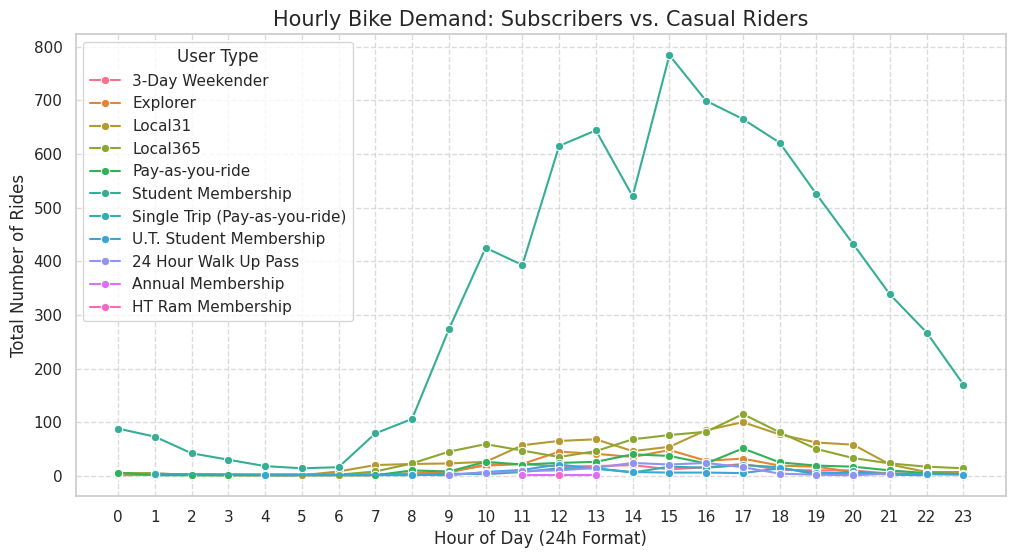

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# וידוא שעמודת הזמן בפורמט הנכון וחילוץ השעה
rentals['start_time'] = pd.to_datetime(rentals['start_time'])
rentals['hour'] = rentals['start_time'].dt.hour

# יצירת גרף פילוג לפי שעה וסוג לקוח
plt.figure(figsize=(12, 6))
sns.lineplot(data=rentals.groupby(['hour', 'subscriber_type']).size().reset_index(name='ride_count'),
             x='hour', y='ride_count', hue='subscriber_type', marker='o')

# עיצוב הגרף
plt.title('Hourly Bike Demand: Subscribers vs. Casual Riders', fontsize=15)
plt.xlabel('Hour of Day (24h Format)', fontsize=12)
plt.ylabel('Total Number of Rides', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='User Type')

plt.show()

**Insight:**

We identified that Subscribers drive the morning peak, confirming our hypothesis that bikes are a primary transit tool for students and commuters.



**Action:**

The Casual riders peak during midday, suggesting that marketing efforts for 'Day Passes' should focus on lunch hours and tourist hotspots.

This visualization tells us exactly when most of the predicted 58 rides for April 1st will occur at Station 2498.

Since the majority of these trips are made by subscribers, we can assure management that the peak demand will hit precisely at 8:30 AM rather than being spread throughout the day.

This insight allows for highly accurate workforce planning and targeted inventory management.

In [32]:
# יצירת עמודה שמזהה מסלול מעגלי
rentals['is_circular'] = rentals['start_station_id'] == rentals['end_station_id']

# חישוב אחוז המסלולים המעגליים מתוך כלל הרכיבות
circular_pct = rentals['is_circular'].mean() * 100
print(f"Percentage of Circular Trips: {circular_pct:.2f}%")

Percentage of Circular Trips: 5.59%


Only 5.59% of all rides are 'Circular Trips' (starting and ending at the same location).

This confirms that the Zen City bike-share system is overwhelmingly used as a functional transit tool for A-to-B commuting, rather than for pure leisure or sightseeing.

This low percentage reinforces the need to focus our resources on high-traffic transit and station-to-station reliability.